In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from google.colab import drive
#Gerekli kütüphaneler import edildi


In [ ]:
drive.mount('/content/drive')
#Drive Colab'a bağlandı

dosya_yolu = '/content/drive/MyDrive/data.csv'
#Dosya yolu belirtildi

data = pd.read_csv(dosya_yolu , encoding='latin1')
#csv dosyasının başka bir kodlama formatında oluşturulmasından dolayı encoding='latin1' eklendi

print(data.head())
print(data.info())

Mounted at /content/drive
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------  

In [ ]:
cleaned_data = data.dropna(subset=['CustomerID'])
cleaned_data['CustomerID'] = cleaned_data['CustomerID'].astype(int)

<ipython-input-4-1974a5f20ab7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['CustomerID'] = cleaned_data['CustomerID'].astype(int)


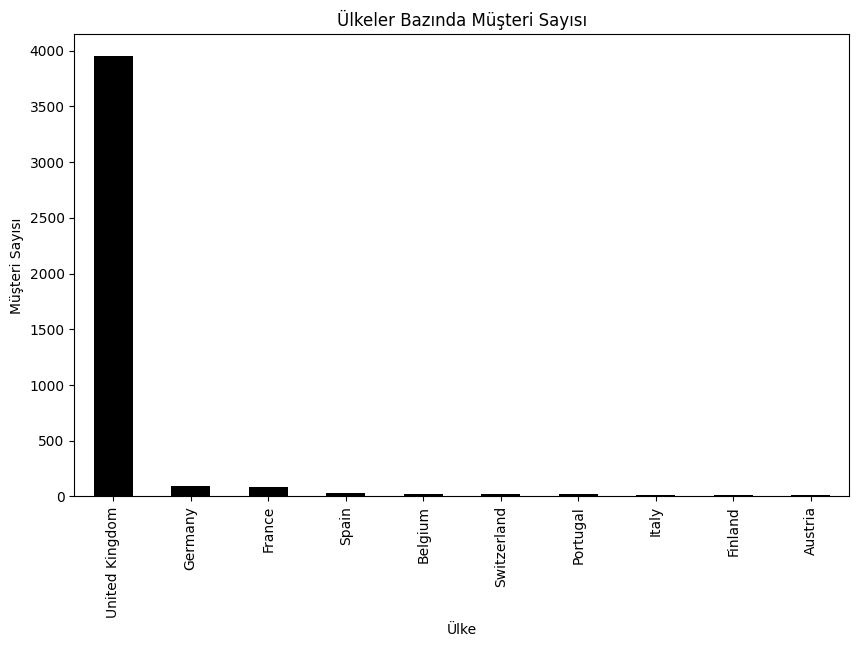

In [ ]:
customer_counts = cleaned_data.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)
customer_counts.head(10).plot(kind='bar',figsize=(10,6),color='black')
plt.title('Ülkeler Bazında Müşteri Sayısı')
plt.xlabel('Ülke')
plt.ylabel('Müşteri Sayısı')
plt.show()

In [ ]:
country_product = cleaned_data.groupby(['Country','Description'])['Quantity'].sum().reset_index()
top_products = country_product.loc[country_product.groupby('Country')['Quantity'].idxmax()]
top_products = top_products.sort_values(by='Country').reset_index(drop=True)
print(top_products)
#Ülkelere göre sen çok satılan ürün

                 Country                          Description  Quantity
0              Australia              MINI PAINT SET VINTAGE       2916
1                Austria     SET 12 KIDS COLOUR  CHALK STICKS       288
2                Bahrain           ICE CREAM SUNDAE LIP GLOSS        96
3                Belgium      PACK OF 72 RETROSPOT CAKE CASES       480
4                 Brazil                 DOLLY GIRL LUNCH BOX        24
5                 Canada           RETRO COFFEE MUGS ASSORTED       504
6        Channel Islands                         RAIN PONCHO        407
7                 Cyprus       HEART DECORATION PAINTED ZINC        384
8         Czech Republic   WOODEN STAR CHRISTMAS SCANDINAVIAN        72
9                Denmark               RED  HARMONICA IN BOX        288
10                  EIRE      PACK OF 72 RETROSPOT CAKE CASES      1632
11    European Community       RED ROCKING HORSE HAND PAINTED        24
12               Finland      CHILDRENS CUTLERY POLKADOT PINK   

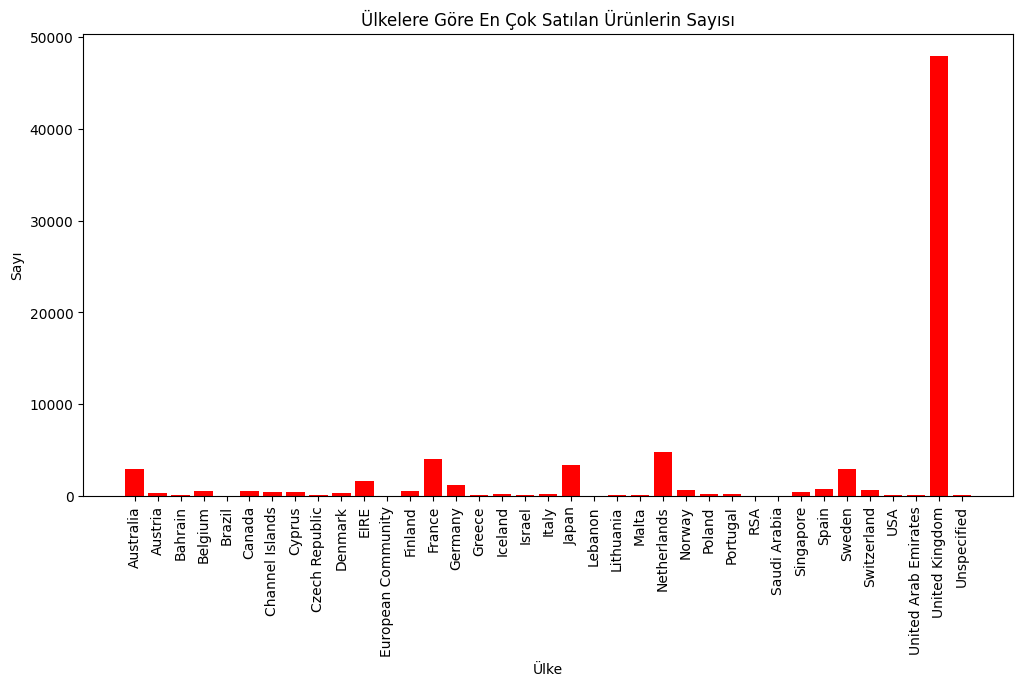

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(top_products['Country'],top_products['Quantity'],color='red')
plt.xticks(rotation=90)
plt.xlabel('Ülke')
plt.ylabel('Sayı')
plt.title('Ülkelere Göre En Çok Satılan Ürünlerin Sayısı')
plt.show()

<ipython-input-11-7189a25270c1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['InvoiceDate'] = pd.to_datetime(cleaned_data['InvoiceDate'])
<ipython-input-11-7189a25270c1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Month'] = cleaned_data['InvoiceDate'].dt.month


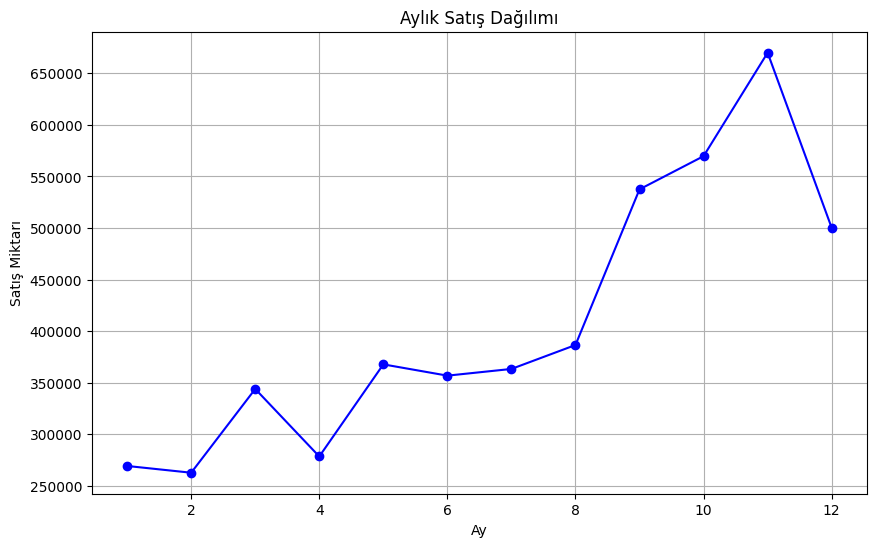

In [ ]:
# Satışların Aylık Dağılımı Analizi
# Tarih sütununun formatını datetime olarak ayarlıyoruz
cleaned_data['InvoiceDate'] = pd.to_datetime(cleaned_data['InvoiceDate'])

# Aylık satış miktarlarını analiz etmek için 'Month' sütununu ekliyoruz
cleaned_data['Month'] = cleaned_data['InvoiceDate'].dt.month

# Aylık toplam satış miktarını hesaplıyoruz
monthly_sales = cleaned_data.groupby('Month')['Quantity'].sum()

# Satış miktarlarının aylık dağılımını görselleştiriyoruz
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.xlabel('Ay')
plt.ylabel('Satış Miktarı')
plt.title('Aylık Satış Dağılımı')
plt.grid()
plt.show()


            Recency  Frequency  Monetary
CustomerID                              
12346           325          2         0
12347             2        182      2458
12348            75         31      2341
12349            18         73       631
12350           310         17       197
           Recency    Frequency       Monetary
count  4372.000000  4372.000000    4372.000000
mean     91.581199    93.053294    1122.344007
std     100.772139   232.471608    4672.790720
min       0.000000     1.000000    -303.000000
25%      16.000000    17.000000     153.000000
50%      50.000000    42.000000     365.000000
75%     143.000000   102.000000     962.250000
max     373.000000  7983.000000  196719.000000


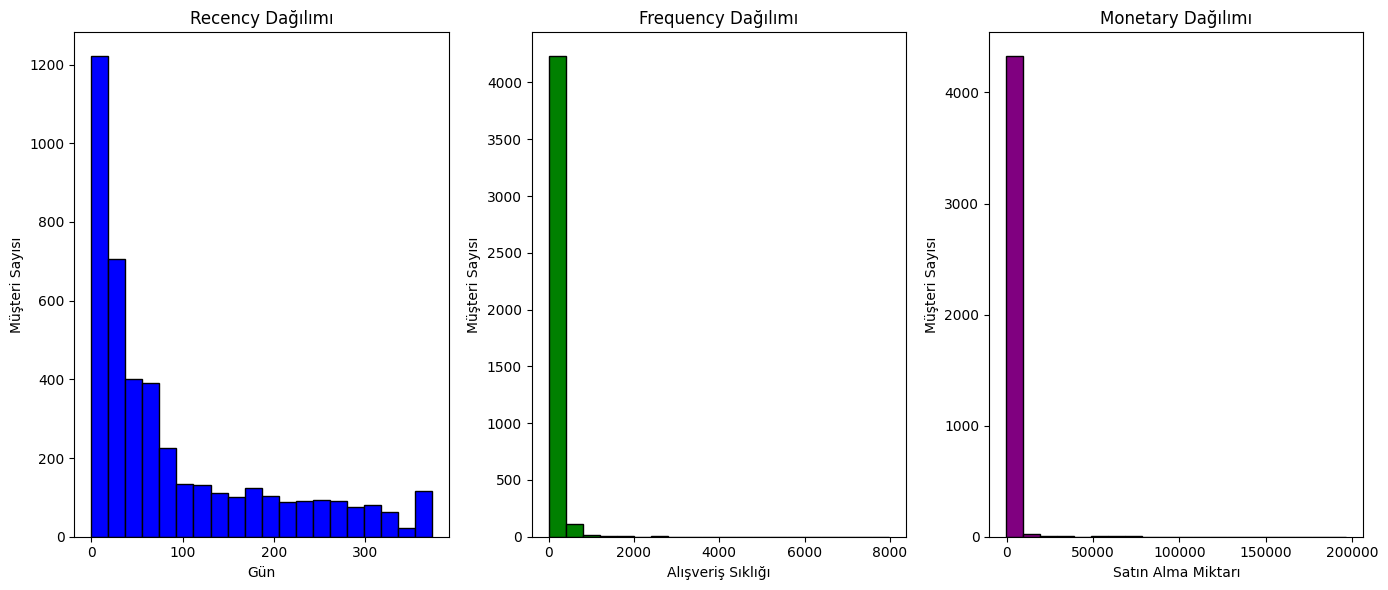

In [ ]:
# Müşteri Davranışlarının RFM Analizi
# RFM analizi ile müşterilerin son satın alma tarihine göre (Recency), alışveriş sıklığına göre (Frequency) ve toplam satın alma miktarına göre (Monetary) bir değerlendirme yapılır.

import datetime as dt

# Veri setindeki tarihe uygun olarak bugünkü tarihi belirtiyoruz
now = dt.datetime(2011, 12, 10)

# RFM metriklerini hesaplıyoruz
rfm = cleaned_data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (now - x.max()).days,  # Son alışverişten bu yana geçen gün sayısı
    'InvoiceNo': 'count',  # Alışveriş sıklığı
    'Quantity': 'sum'  # Toplam satın alma miktarı
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'Quantity': 'Monetary'})

# Recency değerini tam sayı olarak belirtiyoruz
rfm['Recency'] = rfm['Recency'].astype(int)

# İlk birkaç satırı görüntülüyoruz
print(rfm.head())

# RFM analizinin temel istatistiklerini gözlemleyerek müşteriler hakkında bilgi edinebilirsiniz
print(rfm.describe())

# RFM analizinden elde edilen sonuçların dağılımını görselleştirebiliriz
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.hist(rfm['Recency'], bins=20, color='blue', edgecolor='black')
plt.title('Recency Dağılımı')
plt.xlabel('Gün')
plt.ylabel('Müşteri Sayısı')

plt.subplot(1, 3, 2)
plt.hist(rfm['Frequency'], bins=20, color='green', edgecolor='black')
plt.title('Frequency Dağılımı')
plt.xlabel('Alışveriş Sıklığı')
plt.ylabel('Müşteri Sayısı')

plt.subplot(1, 3, 3)
plt.hist(rfm['Monetary'], bins=20, color='purple', edgecolor='black')
plt.title('Monetary Dağılımı')
plt.xlabel('Satın Alma Miktarı')
plt.ylabel('Müşteri Sayısı')

plt.tight_layout()
plt.show()


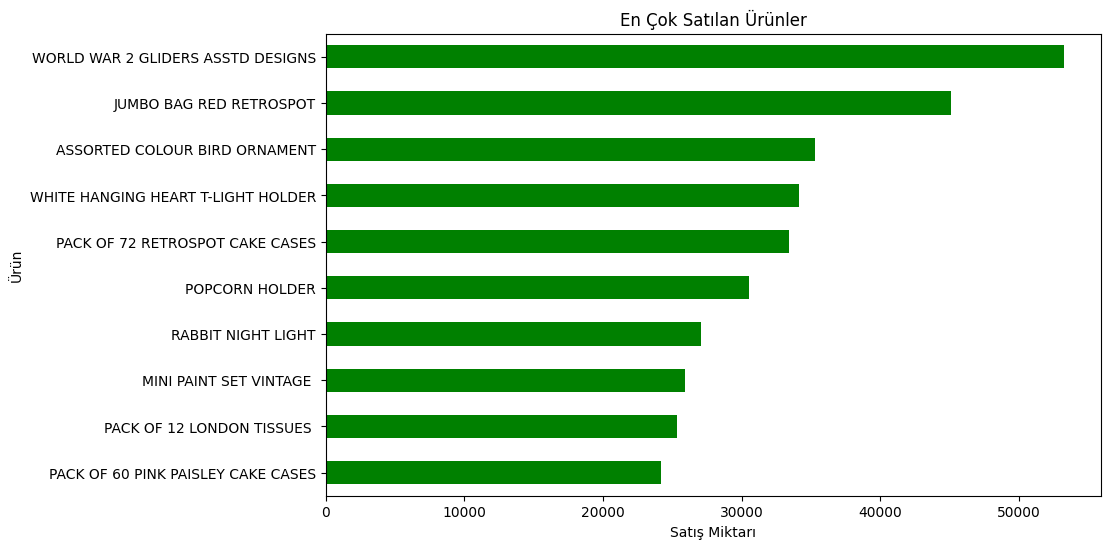

In [ ]:
# En Çok Satılan Ürünlerin Analizi
# Ürün açıklamalarına göre satış miktarlarını grupluyoruz ve en çok satan 10 ürünü belirliyoruz
top_categories = cleaned_data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# En çok satan ürünleri görselleştiriyoruz
plt.figure(figsize=(10, 6))
top_categories.plot(kind='barh', color='green')
plt.xlabel('Satış Miktarı')
plt.ylabel('Ürün')
plt.title('En Çok Satılan Ürünler')
plt.gca().invert_yaxis()  # Büyükten küçüğe sıralama için y eksenini ters çeviriyoruz
plt.show()


In [ ]:
# Kullanıcı ve ürünlerin ilişkisini içeren bir pivot tablosu oluşturuyoruz
user_item_matrix = cleaned_data.pivot_table(index='CustomerID', columns='Description', values='Quantity', aggfunc='sum', fill_value=0)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


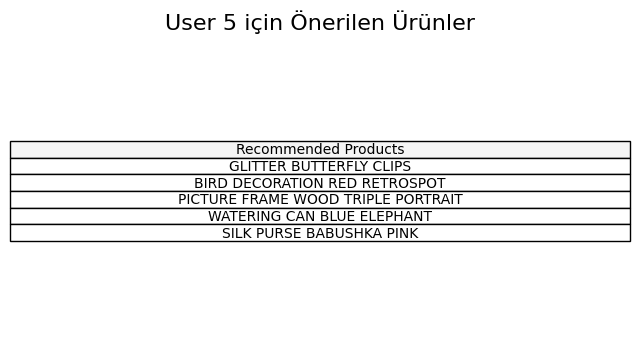

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd
import matplotlib.pyplot as plt

def recommend_products(user_id, num_recommendations=5):
    similar_users = cosine_sim[user_id]
    similar_users_idx = similar_users.argsort()[-num_recommendations-1:-1][::-1]

    recommendations = []
    for idx in similar_users_idx:
        recommended_items = user_item_matrix.iloc[idx]
        recommended_items = recommended_items[recommended_items > 0].index.tolist()
        recommendations.extend(recommended_items)

    # En popüler ürünleri önerelim
    recommendations = list(set(recommendations))[:num_recommendations]
    return recommendations

# Örnek olarak, 5. kullanıcı için ürün önerisi alalım
user_id = 5
recommended_products = recommend_products(user_id, 5)

# Tabloda görselleştirmek için pandas DataFrame oluşturuyoruz
df_recommendations = pd.DataFrame(recommended_products, columns=["Recommended Products"])

# Tabloyu görselleştiriyoruz
plt.figure(figsize=(8, 4))
plt.axis('off')  # Tabloyu görünür yapmak için eksenleri kapatıyoruz
plt.table(cellText=df_recommendations.values, colLabels=df_recommendations.columns, loc='center', cellLoc='center', colColours=['#f5f5f5']*len(df_recommendations.columns))

plt.title(f"User {user_id} için Önerilen Ürünler", fontsize=16)
plt.show()



